<a href="https://colab.research.google.com/github/kingy434/Sam-portfolio/blob/main/the-chase/the_chase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Chase Israel classification problem

As an avid watcher of the UK version of the Chase, I was very interested to see if I could find any datasets related to the show. I found this one [https://www.kaggle.com/thomaskonstantin/the-chasegame-show-israel-episode-data] from the Israeli version of the show and decided to analyse. I want to build a model that is able to classify whether a team has won or lost. A quick overview of the game format: there is a team of 4 who each individually have to build up cash by answering questions. They are then offered a higher, lower, or the same amount of money to choose. They then answer questions against a professional quizzer and if they're not caught they make it through to the final Chase in which the remaining members of the team answer as many questions as they can in a minute and a half. If they get more than the quizzer is able to do then they win the money. With this context in place there are questions that I would like to consider when performing my explatory data analysis

Questions to consider:
- Is there any correlation between age and the fast round sum?
- Is there any correlation between gender and the fast round sum?
- Are men or women more likely to choose the higher/lower offer?
- Which age groups are more likely to choose the higher/lower offer?


Let us begin by loading the data and previewing what it looks like

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

files.upload()

data = pd.read_csv("thechase.csv")
data.head()

,p_1_gender,p_1_age,p_1_fast_round_sum,p_1_play_sum_chosen,p1_round_status,p_2_gender,p_2_age,p_2_fast_round_sum,p_2_play_sum_chosen,p_2_round_status,p_3_gender,p_3_age,p_3_fast_round_sum,p_3_play_sum_chosen,p_3_round_status,p_4_gender,p_4_age,p_4_fast_round_sum,p_4_play_sum_chosen,p_4_round_status,team_total_sum,question_answered,game_result,season
0,male,30,20000,20000,1,female,27,50000,50000,1,male,56,35000,35000,1,female,30,30000,30000,0,105000,19,0,1
1,male,45,35000,35000,1,female,67,30000,30000,0,female,30,20000,20000,1,male,33,50000,160000,1,215000,23,0,1
2,female,33,25000,25000,1,male,57,20000,20000,1,female,38,15000,15000,1,male,32,40000,140000,0,60000,23,0,1
3,male,34,35000,35000,1,female,29,30000,30000,1,female,24,25000,25000,1,male,32,20000,90000,0,90000,24,1,1
4,male,50,30000,90000,0,female,38,35000,35000,1,female,31,35000,35000,1,male,30,25000,25000,0,70000,18,0,1


As we can see, we have 24 variables for our data. Each player has 5 variables about them each, and there are 4 variables regarding the team performance in general. Certain labels like male and female will need to be encoded in a bit. First, we have a look to make sure that the variables have the right data type.

In [ ]:
data.dtypes

p_1_gender             object
p_1_age                 int64
p_1_fast_round_sum      int64
p_1_play_sum_chosen     int64
p1_round_status         int64
p_2_gender             object
p_2_age                 int64
p_2_fast_round_sum      int64
p_2_play_sum_chosen     int64
p_2_round_status        int64
p_3_gender             object
p_3_age                 int64
p_3_fast_round_sum      int64
p_3_play_sum_chosen     int64
p_3_round_status        int64
p_4_gender             object
p_4_age                 int64
p_4_fast_round_sum      int64
p_4_play_sum_chosen     int64
p_4_round_status        int64
team_total_sum          int64
question_answered       int64
game_result             int64
season                  int64
dtype: object

Luckily for us, the data is mostly the right type. Those with type object, like the gender variable mentioned earlier, will now be encoded.

In [ ]:
encoders = {"p_1_gender": {"male": 0, "female": 1},
            "p_2_gender": {"male": 0, "female": 1},
            "p_3_gender": {"male": 0, "female": 1},
            "p_4_gender": {"male": 0, "female": 1}}
team_data = data.replace(encoders)
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   p_1_gender           101 non-null    int64
 1   p_1_age              101 non-null    int64
 2   p_1_fast_round_sum   101 non-null    int64
 3   p_1_play_sum_chosen  101 non-null    int64
 4   p1_round_status      101 non-null    int64
 5   p_2_gender           101 non-null    int64
 6   p_2_age              101 non-null    int64
 7   p_2_fast_round_sum   101 non-null    int64
 8   p_2_play_sum_chosen  101 non-null    int64
 9   p_2_round_status     101 non-null    int64
 10  p_3_gender           101 non-null    int64
 11  p_3_age              101 non-null    int64
 12  p_3_fast_round_sum   101 non-null    int64
 13  p_3_play_sum_chosen  101 non-null    int64
 14  p_3_round_status     101 non-null    int64
 15  p_4_gender           101 non-null    int64
 16  p_4_age              101 n

For data analysis purposes, I decided to form two datasets. One with the performance of the team with context of where the player is placed, and one with how each individual did in their own activities.

In [ ]:
columns = ['gender', 'age', 'fast_round', 'play_sum', 'round_status']
values = {x: np.concatenate((team_data.iloc[:,i], team_data.iloc[:,i+5], 
                    team_data.iloc[:,i+10], team_data.iloc[:,i+15])) for i, x in enumerate(columns)}

ind_data = pd.DataFrame(data = values)
ind_data.head()

,gender,age,fast_round,play_sum,round_status
0,0,30,20000,20000,1
1,0,45,35000,35000,1
2,1,33,25000,25000,1
3,0,34,35000,35000,1
4,0,50,30000,90000,0


Using this individual data, I split it into two dataframes. Those that took the higher offer, and those that went the lower offer

In [ ]:
higher_df = ind_data[ind_data['fast_round'] < ind_data['play_sum']]
lower_df = ind_data[ind_data['fast_round'] > ind_data['play_sum']]

My first area of interest is whether there was any trend of a specific gender choosing the higher or lower offer. I split the data accordingly and plot the graphs

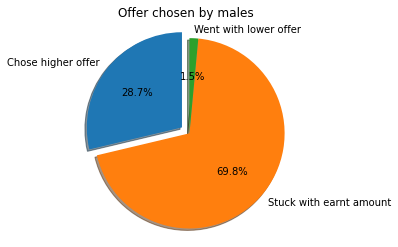

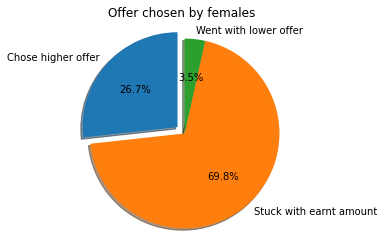

In [ ]:
male_higher_per = (higher_df['gender'].value_counts()[0] /  ind_data['gender'].value_counts()[0]) * 100
female_higher_per = (higher_df['gender'].value_counts()[1] /  ind_data['gender'].value_counts()[1]) * 100
male_lower_per = (lower_df['gender'].value_counts()[0] /  ind_data['gender'].value_counts()[0]) * 100
female_lower_per = (lower_df['gender'].value_counts()[1] /  ind_data['gender'].value_counts()[1]) * 100

labels = 'Chose higher offer', 'Stuck with earnt amount', 'Went with lower offer'
sizes_male = [male_higher_per, 100 - male_higher_per - male_lower_per, male_lower_per]
sizes_female = [female_higher_per, 100 - female_higher_per - female_lower_per, female_lower_per]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.pie(sizes_male, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax2.pie(sizes_female, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

ax1.set_title("Offer chosen by males")
ax2.set_title("Offer chosen by females")

plt.show()

We saw earlier that there was an equal number of males and females so these graphs are representative with reason. Men were slightly more likely to choose the higher offer than females, with females more likely to choose the lower offer than men. The same proportion stuck with the offer that they were given. Following this, I decided to investigate how people in different age groups chose their offers.

In [ ]:
ages = ['15-25', '26-35', '36-45', '46-55', '56-70']
percents = []
for i in ages:
    temp = []
    age_higher_df = higher_df[(higher_df['age'] >= int(i[:2])) & (higher_df['age'] <= int(i[3:]))]
    age_lower_df = lower_df[(lower_df['age'] >= int(i[:2])) & (lower_df['age'] <= int(i[3:]))]
    age_ind_df = ind_data[(ind_data['age'] >= int(i[:2])) & (ind_data['age'] <= int(i[3:]))]                              
    temp.append(sum(age_higher_df['age'].value_counts()) / sum(age_ind_df['age'].value_counts()) * 100)
    temp.append(sum(age_lower_df['age'].value_counts()) / sum(age_ind_df['age'].value_counts()) * 100)
    percents.append(temp)

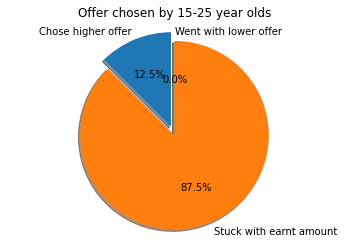

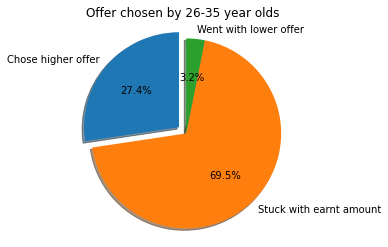

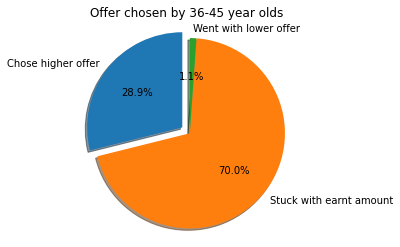

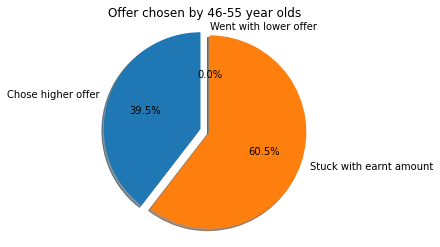

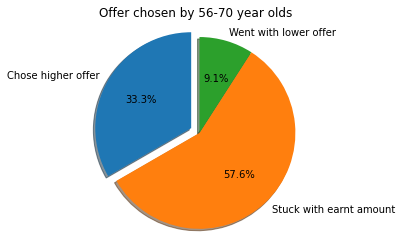

In [ ]:
sizes = []
for i in percents:
    sizes.append([i[0], 100 - i[0] - i[1], i[1]])

explode = (0.1, 0, 0)

for ind, j in enumerate(sizes):
    fig, ax = plt.subplots()
    ax.pie(j, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax.axis('equal')
    ax.set_title("Offer chosen by {} year olds".format(ages[ind]))
    plt.show()

The age range was fairly Gaussian, so the ages at the extremes will not be as representative. The youngest people never took the lower offer, but the oldest people in the group were much more likely to choose the lower offer than anyone else. I think this is indicative of the differing views between the generations with the older generation perhaps being a bit more conservative with the money they could win. The balance for the age groups in the middle is more or less the same, except the 46-55 year olds who were the most likely age group to choose the higher offer

In [ ]:
num_data = team_data[['p_1_age', 'p_1_fast_round_sum', 'p_1_play_sum_chosen', 
                 'p_2_age', 'p_2_fast_round_sum', 'p_2_play_sum_chosen', 
                 'p_3_age', 'p_3_fast_round_sum', 'p_3_play_sum_chosen', 
                 'p_4_age', 'p_4_fast_round_sum', 'p_4_play_sum_chosen', 
                 'team_total_sum', 'question_answered']]

cat_data = team_data[['p_1_gender', 'p1_round_status',
                'p_2_gender', 'p_2_round_status',
                'p_3_gender', 'p_3_round_status',
                'p_4_gender', 'p_4_round_status',
                'game_result', 'season']]

In [ ]:
num_data.describe()

,p_1_age,p_1_fast_round_sum,p_1_play_sum_chosen,p_2_age,p_2_fast_round_sum,p_2_play_sum_chosen,p_3_age,p_3_fast_round_sum,p_3_play_sum_chosen,p_4_age,p_4_fast_round_sum,p_4_play_sum_chosen,team_total_sum,question_answered
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,36.326733,30049.504950,56871.287129,35.861386,29059.405941,50881.188119,34.376238,27178.217822,54059.405941,37.643564,34653.465347,67544.554455,138306.930693,21.118812
std,10.445199,8817.455685,43295.649520,13.040728,10740.411335,41988.400095,10.886553,10281.435736,49440.433206,10.108001,9981.418380,55061.152322,66913.338368,3.589672
min,15.000000,10000.000000,3000.000000,16.000000,5000.000000,9000.000000,15.000000,5000.000000,5000.000000,17.000000,15000.000000,2000.000000,10000.000000,14.000000
25%,30.000000,25000.000000,25000.000000,27.000000,20000.000000,25000.000000,27.000000,20000.000000,25000.000000,31.000000,30000.000000,30000.000000,80000.000000,18.000000
50%,34.000000,30000.000000,35000.000000,32.000000,30000.000000,35000.000000,31.000000,30000.000000,30000.000000,35.000000,35000.000000,40000.000000,120000.000000,21.000000
75%,40.000000,35000.000000,100000.000000,44.000000,35000.000000,50000.000000,38.000000,35000.000000,50000.000000,41.000000,40000.000000,110000.000000,190000.000000,23.000000
max,67.000000,60000.000000,160000.000000,67.000000,60000.000000,170000.000000,65.000000,50000.000000,175000.000000,69.000000,55000.000000,220000.000000,290000.000000,31.000000


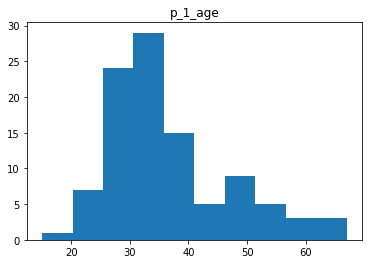

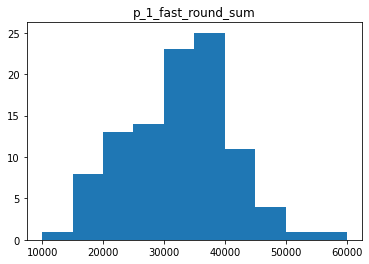

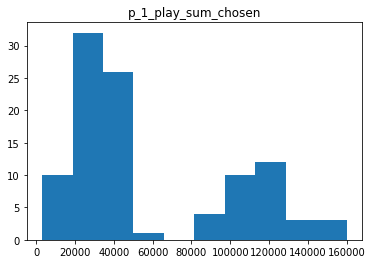

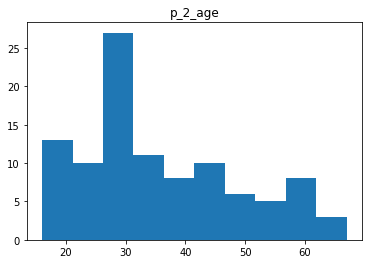

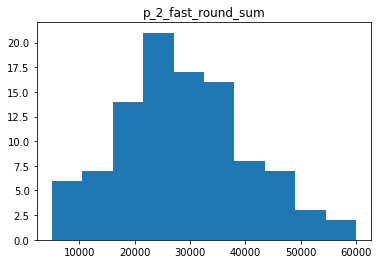

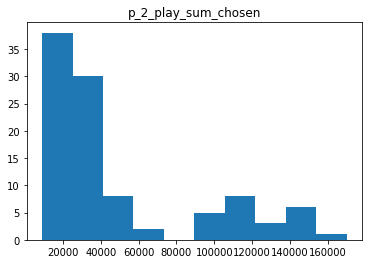

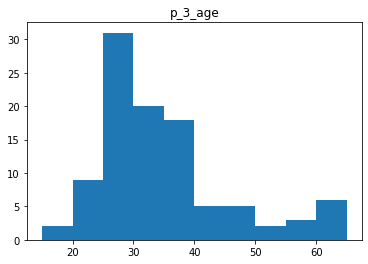

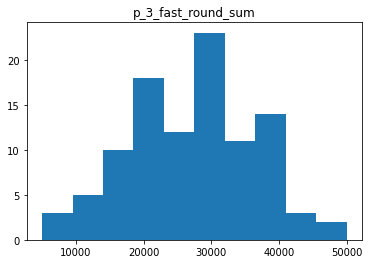

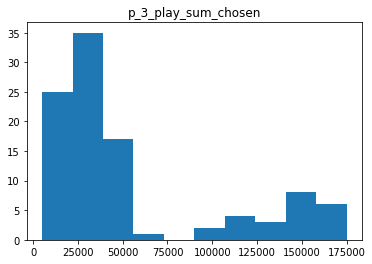

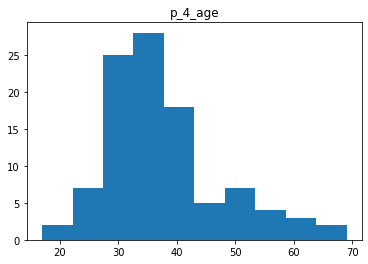

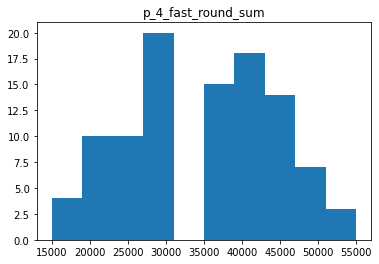

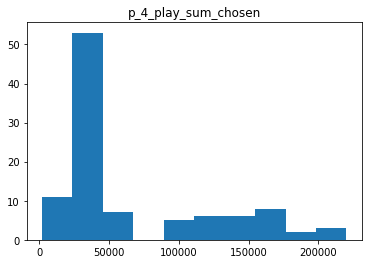

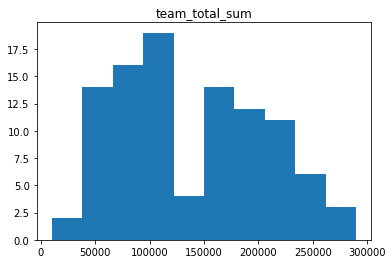

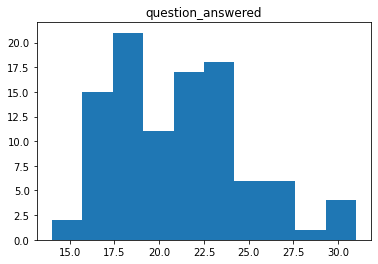

In [ ]:
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

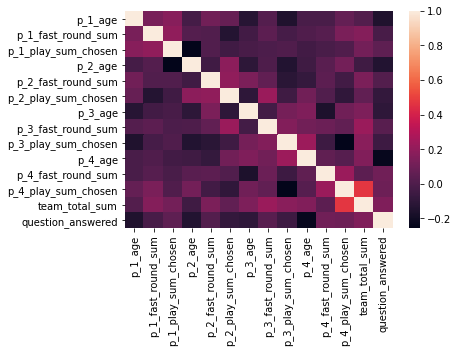

In [ ]:
sns.heatmap(num_data.corr())

In [ ]:
pd.pivot_table(team_data, index = 'game_result', values = ['p_1_age', 'p_1_fast_round_sum', 'p_1_play_sum_chosen', 
                                                           'p_2_age', 'p_2_fast_round_sum', 'p_2_play_sum_chosen', 
                                                           'p_3_age', 'p_3_fast_round_sum', 'p_3_play_sum_chosen',
                                                           'p_4_age', 'p_4_fast_round_sum', 'p_4_play_sum_chosen', 
                                                           'team_total_sum', 'question_answered'])

,p_1_age,p_1_fast_round_sum,p_1_play_sum_chosen,p_2_age,p_2_fast_round_sum,p_2_play_sum_chosen,p_3_age,p_3_fast_round_sum,p_3_play_sum_chosen,p_4_age,p_4_fast_round_sum,p_4_play_sum_chosen,question_answered,team_total_sum
game_result,,,,,,,,,,,,,,
0,37.418919,30270.270270,57243.243243,37.472973,29054.054054,54986.486486,34.824324,27162.162162,55878.378378,38.513514,34729.729730,65445.945946,19.621622,132256.756757
1,33.333333,29444.444444,55851.851852,31.444444,29074.074074,39629.629630,33.148148,27222.222222,49074.074074,35.259259,34444.444444,73296.296296,25.222222,154888.888889


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


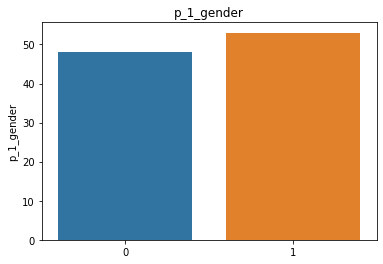

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


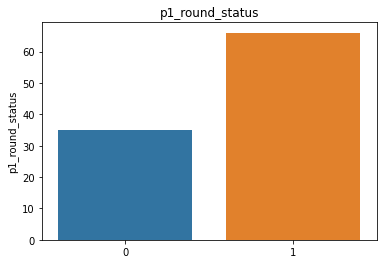

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


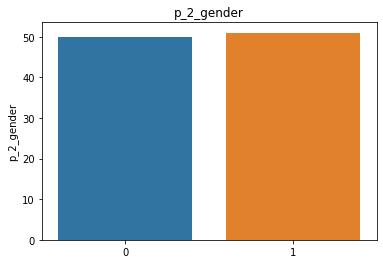

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


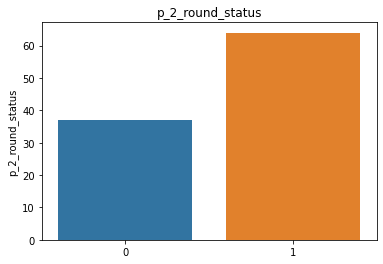

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


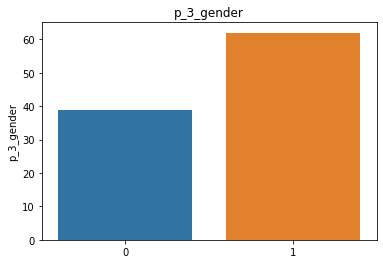

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


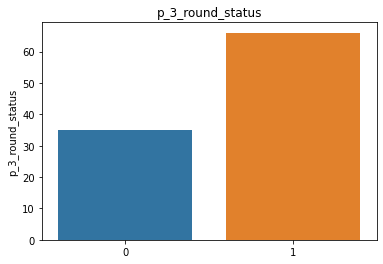

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


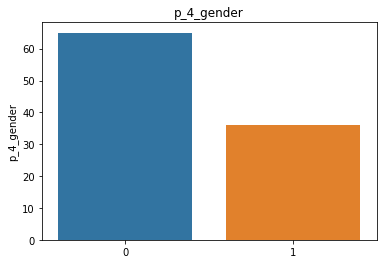

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


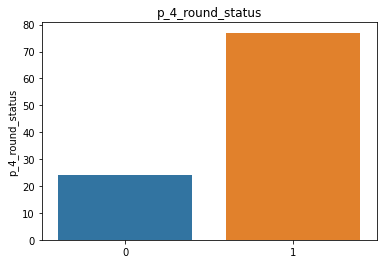

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


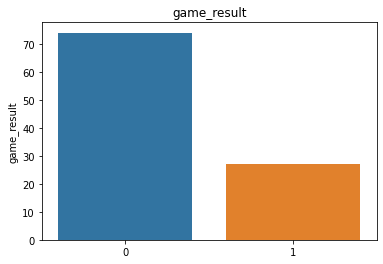

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


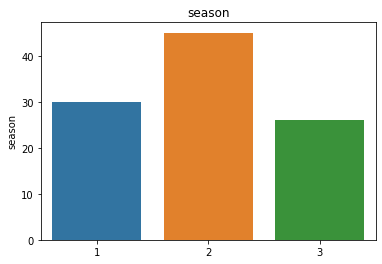

In [ ]:
for i in cat_data.columns:
    sns.barplot(cat_data[i].value_counts().index, cat_data[i].value_counts()).set_title(i)
    plt.show()

Having performed my exploratory data analysis, I now move on to creating a model to predict whether or not a team has won or lost based on how they have done so far in the show. I test 5 models: simple Logistic Regression, KNN, Decision Tree, SVC, and a Random Forest model. I use nested cross validation to tune the parameters to get the best results using Grid Search. 

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(team_data.drop(columns=['game_result']), team_data.iloc[:,22],
                                                    train_size=0.7,
                                                    random_state=1)

# Initializing Classifiers
clf1 = LogisticRegression(multi_class='multinomial',
                          solver='newton-cg',
                          random_state=1)
clf2 = KNeighborsClassifier(algorithm='ball_tree',
                            leaf_size=50)
clf3 = DecisionTreeClassifier(random_state=1)
clf4 = SVC(random_state=1)
clf5 = RandomForestClassifier(random_state=1)

# Building the pipelines
pipe1 = Pipeline([('std', StandardScaler()),
                  ('clf1', clf1)])

pipe2 = Pipeline([('std', StandardScaler()),
                  ('clf2', clf2)])

pipe4 = Pipeline([('std', StandardScaler()),
                  ('clf4', clf4)])


# Setting up the parameter grids
param_grid1 = [{'clf1__penalty': ['l2'],
                'clf1__C': np.power(10., np.arange(-4, 4))}]

param_grid2 = [{'clf2__n_neighbors': list(range(1, 10)),
                'clf2__p': [1, 2]}]

param_grid3 = [{'max_depth': list(range(1, 10)) + [None],
                'criterion': ['gini', 'entropy']}]

param_grid4 = [{'clf4__kernel': ['rbf'],
                'clf4__C': np.power(10., np.arange(-4, 4)),
                'clf4__gamma': np.power(10., np.arange(-5, 0))},
               {'clf4__kernel': ['linear'],
                'clf4__C': np.power(10., np.arange(-4, 4))}]

param_grid5 = [{'n_estimators': list(range(1,200)),
                'criterion': ['gini', 'entropy']}]

# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs = {}
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

for pgrid, est, name in zip((param_grid1, param_grid2,
                             param_grid3, param_grid4, param_grid5),
                            (pipe1, pipe2, clf3, pipe4, clf5),
                            ('Softmax', 'KNN', 'DTree', 'SVM', 'Random Forest Classifier')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring='accuracy',
                       n_jobs=1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True)
    gridcvs[name] = gcv

In [ ]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for name, gs_est in sorted(gridcvs.items()):
    nested_score = cross_val_score(gs_est, 
                                   X=X_train, 
                                   y=y_train, 
                                   cv=outer_cv,
                                   n_jobs=1)
    print('%s | outer ACC %.2f%% +/- %.2f' % 
          (name, nested_score.mean() * 100, nested_score.std() * 100))

DTree | outer ACC 92.86% +/- 4.52
KNN | outer ACC 80.00% +/- 7.00
Random Forest Classifier | outer ACC 84.29% +/- 7.00
SVM | outer ACC 80.00% +/- 5.35
Softmax | outer ACC 87.14% +/- 11.43


We can see from these results that the best performing model here is the Decision Tree with an accuracy of 92.86%. This model also has the lowest variance of accuracy compared to the others so I am pretty confident this model will work.

In [ ]:
# Fitting a model to the whole training set
# using the "best" algorithm
best_algo = gridcvs['DTree']

best_algo.fit(X_train, y_train)
train_acc = accuracy_score(y_true=y_train, y_pred=best_algo.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=best_algo.predict(X_test))

print('Accuracy %.2f%% (average over CV test folds)' %
      (100 * best_algo.best_score_))
print('Best Parameters: %s' % gridcvs['DTree'].best_params_)
print('Training Accuracy: %.2f%%' % (100 * train_acc))
print('Test Accuracy: %.2f%%' % (100 * test_acc))

Accuracy 85.71% (average over CV test folds)
Best Parameters: {'criterion': 'gini', 'max_depth': 1}
Training Accuracy: 92.86%
Test Accuracy: 80.65%


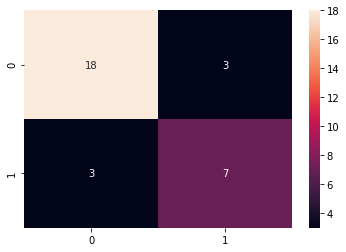

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, best_algo.predict(X_test)), annot=True)

As expected, the model performs really well on the teams that lost. Of course a low total in the final round is an important indicator of how well they'll do but the other factors as well play a part in this. Factors such as how 'smart' the team is based on how much money they accumulated to get there.